# Matrix Plots and Multi-Variable Visualizations

<!--
Author: Molla Samser
Website: https://rskworld.in/
Email: help@rskworld.in
Phone: +91 93305 39277
Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147
-->

This notebook demonstrates matrix plots and multi-variable visualizations:
- Scatter matrix plots
- Correlation matrix with different visualizations
- Multi-dimensional analysis
- Grid-based visualizations


In [1]:
# Author: Molla Samser
# Website: https://rskworld.in/
# Email: help@rskworld.in
# Phone: +91 93305 39277
# Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)

# Load data
df = pd.read_csv('../data/sample_data.csv')
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (30, 9)


,age,income,education_years,experience,gender,category,score,sales,region
0,25,45000,12,2,Male,Category A,75,1200,North
1,30,55000,14,5,Female,Category B,82,1500,South
2,35,65000,16,8,Male,Category A,88,1800,East
3,28,48000,13,3,Female,Category C,70,1100,West
4,32,60000,15,6,Male,Category B,85,1700,North


## 1. Enhanced Pair Plot with Multiple Features


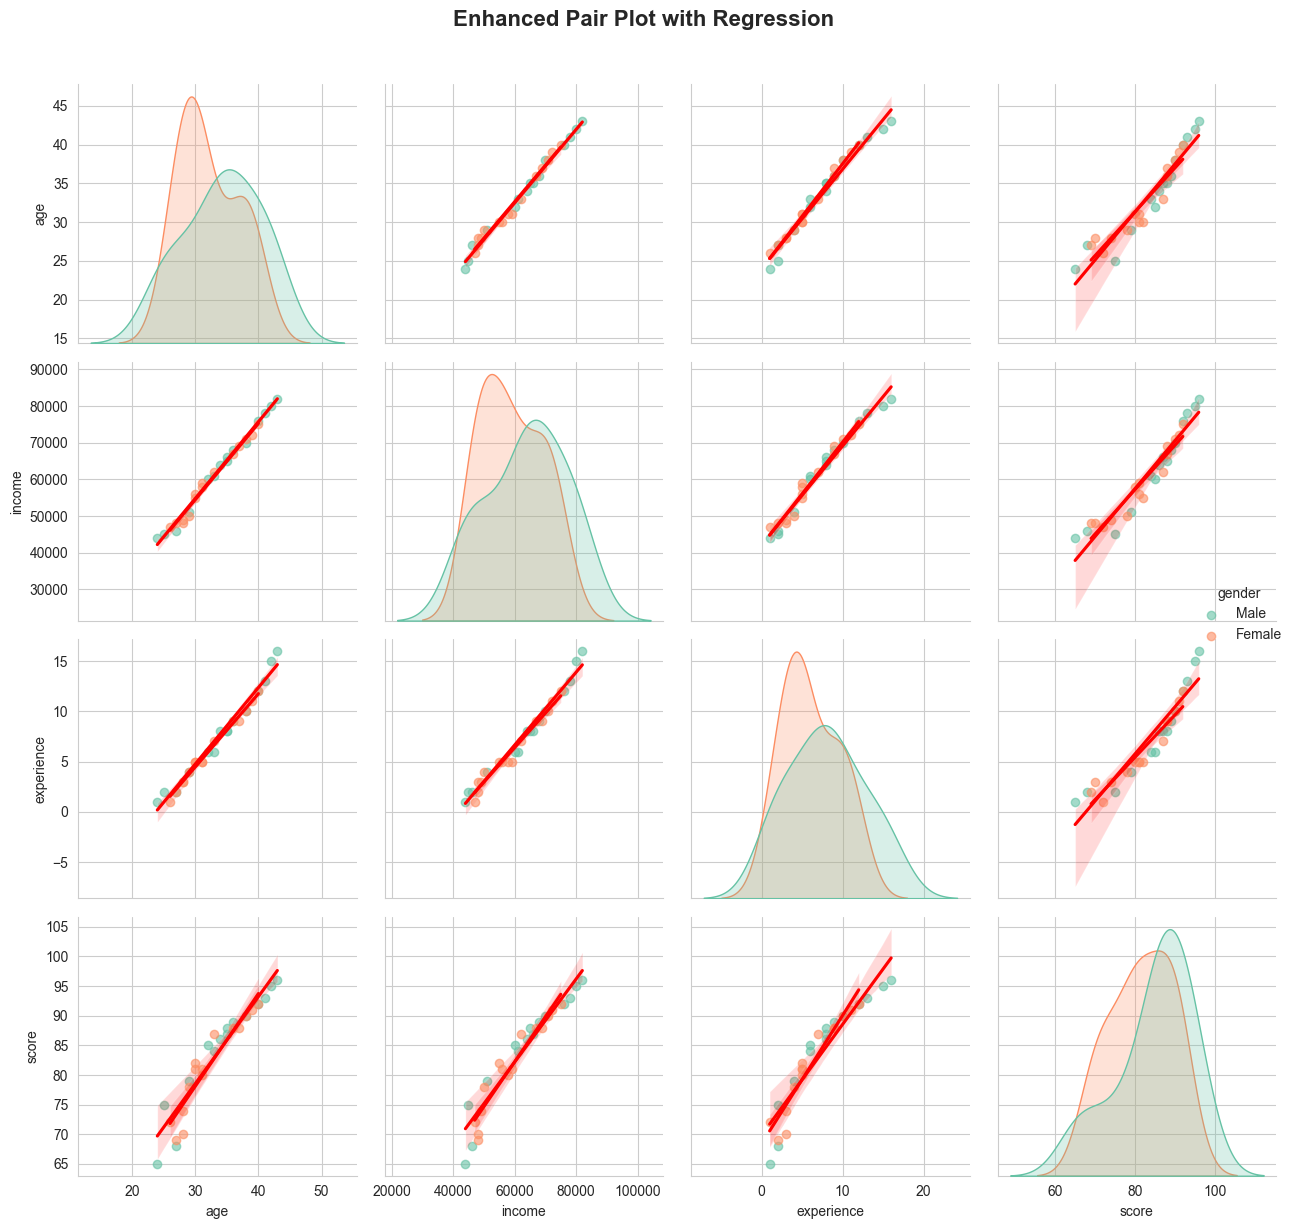

In [2]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Enhanced pair plot with regression
numeric_cols = ['age', 'income', 'experience', 'score']
g = sns.pairplot(df, vars=numeric_cols, hue='gender', 
                 diag_kind='kde', kind='reg', 
                 plot_kws={'scatter_kws': {'alpha': 0.6}, 'line_kws': {'color': 'red'}},
                 height=3, palette='Set2')
g.fig.suptitle('Enhanced Pair Plot with Regression', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../images/enhanced_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()


## 2. Correlation Matrix with Multiple Visualizations


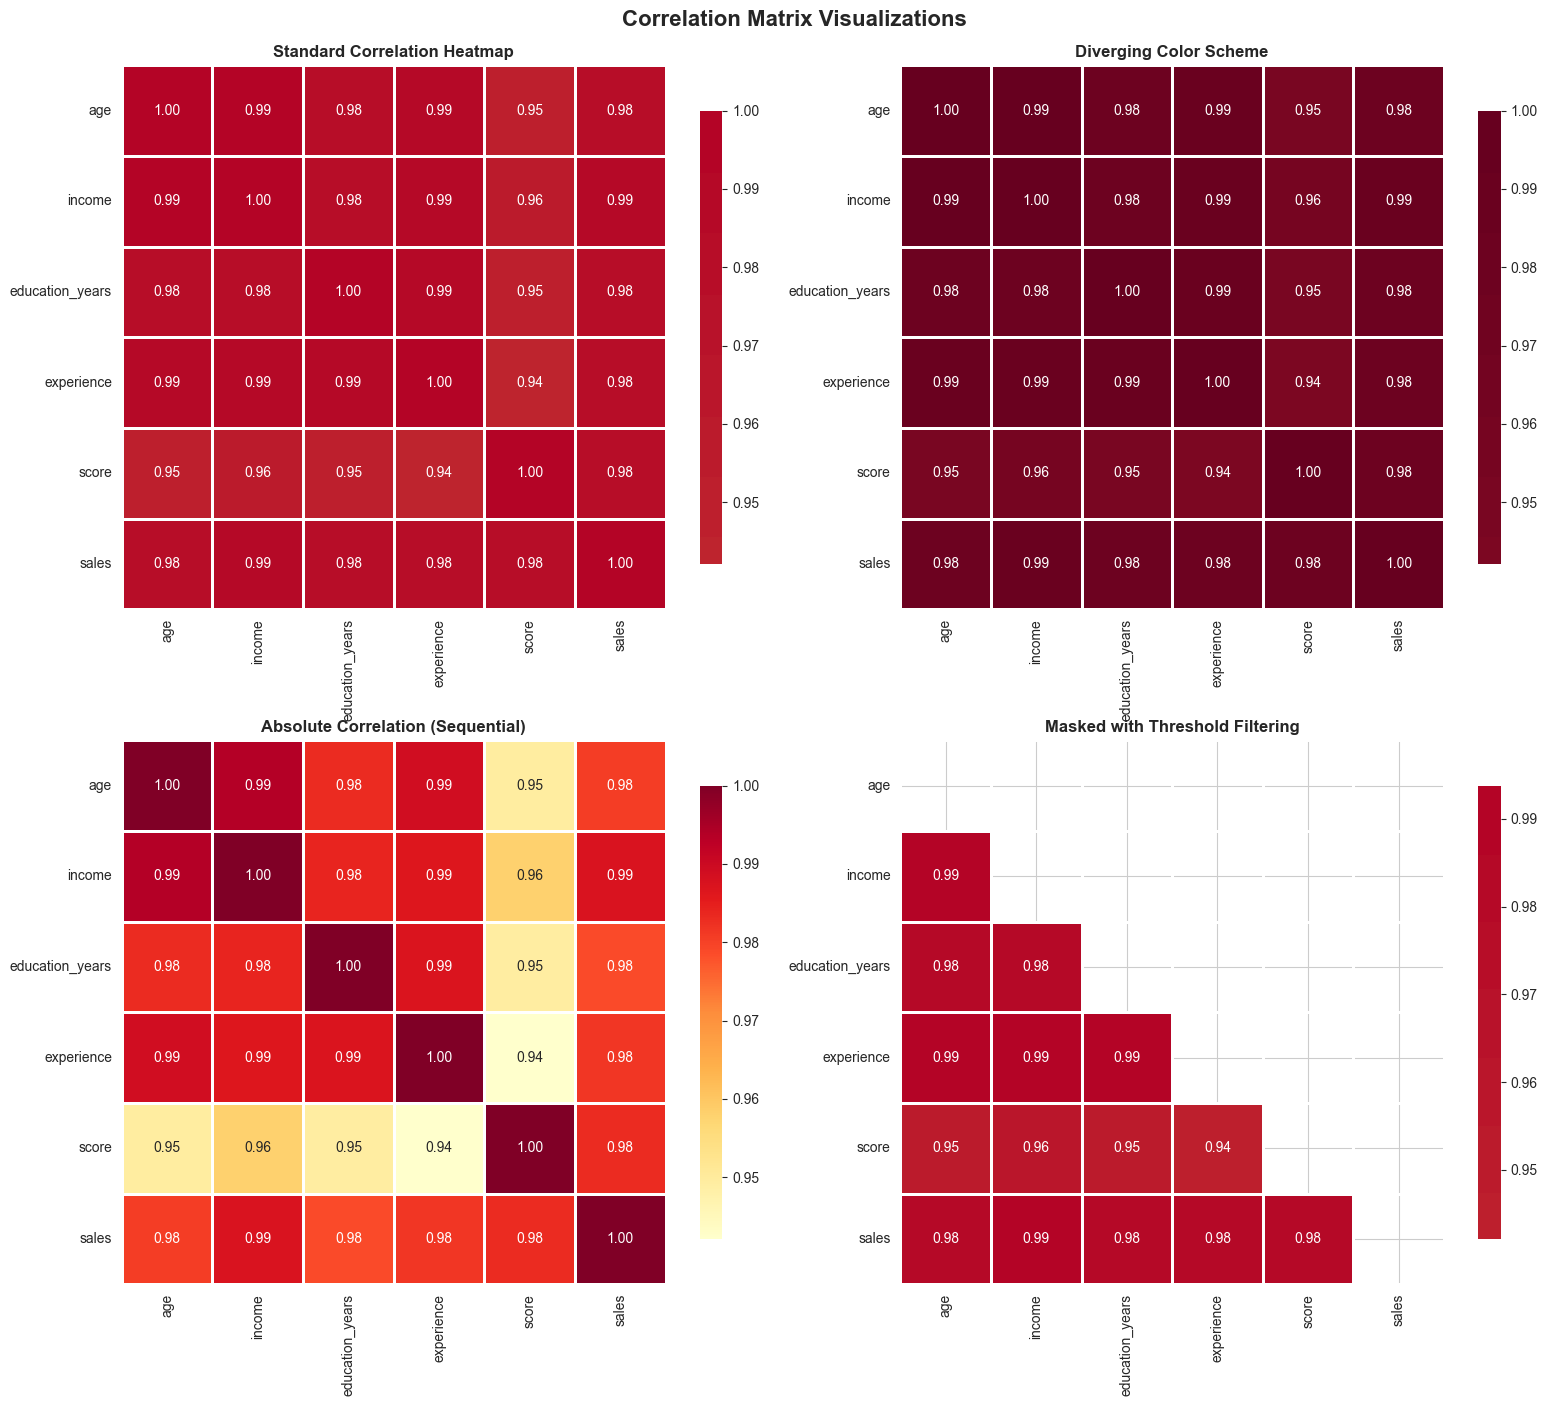

In [3]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Multiple correlation visualizations
numeric_cols = ['age', 'income', 'education_years', 'experience', 'score', 'sales']
corr_matrix = df[numeric_cols].corr()

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Standard heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0, 0])
axes[0, 0].set_title('Standard Correlation Heatmap', fontsize=12, fontweight='bold')

# Diverging color scheme
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8}, ax=axes[0, 1])
axes[0, 1].set_title('Diverging Color Scheme', fontsize=12, fontweight='bold')

# Sequential color scheme
sns.heatmap(corr_matrix.abs(), annot=True, fmt='.2f', cmap='YlOrRd',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1, 0])
axes[1, 0].set_title('Absolute Correlation (Sequential)', fontsize=12, fontweight='bold')

# Custom annotations with significance
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
annot_matrix = corr_matrix.copy()
for i in range(len(annot_matrix)):
    for j in range(len(annot_matrix)):
        if abs(annot_matrix.iloc[i, j]) < 0.3:
            annot_matrix.iloc[i, j] = np.nan

sns.heatmap(corr_matrix, mask=mask, annot=annot_matrix, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8}, ax=axes[1, 1])
axes[1, 1].set_title('Masked with Threshold Filtering', fontsize=12, fontweight='bold')

plt.suptitle('Correlation Matrix Visualizations', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/correlation_matrix_variations.png', dpi=300, bbox_inches='tight')
plt.show()
